In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data['output'].unique()

array([1, 0])

In [ ]:
data.shape

(303, 14)

In [ ]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"])

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
unique count,41,2,4,49,152,2,3,91,2,40,3,5,4,2


In [ ]:
data.describe(include = 'all')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
X = data.drop('output', axis = 1)
y = data['output']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter = 1700, activation = 'relu')
model.fit(X_train,y_train)

MLPClassifier(max_iter=1700)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
prediction

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import math
import seaborn as sns
import matplotlib.pyplot as plt

Accuracy for test set = 80.21978021978022 (81 percent)
Precision for test set = 71.42857142857143 (72 percent)
Recall for test set = 83.33333333333334 (84 percent)
F1 for test set = 76.92307692307692 (77 percent)


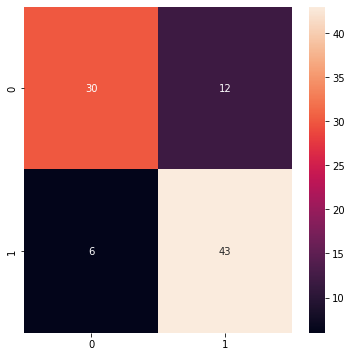

In [ ]:

cm = confusion_matrix(y_test,prediction)
plt.figure(figsize = (6,6))
sns.heatmap(cm, annot=True)

TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]
accuracy=((TP+TN)/(TP+TN+FP+FN))*100
precision=(TP/(TP+FP))*100
recall=(TP/(TP+FN))*100
F1=2*(1/((1/precision)+(1/recall)))
print('Accuracy for test set =', accuracy , "(%d percent)" %math.ceil(accuracy))
print('Precision for test set =', precision, "(%d percent)" %math.ceil(precision))
print('Recall for test set =',recall, "(%d percent)" %math.ceil(recall))
print('F1 for test set =', F1, "(%d percent)" %math.ceil(F1))

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
dataset=pd.read_csv('heart.csv')

In [ ]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
model1=tf.keras.models.Sequential()

In [35]:
model1.add(tf.keras.layers.Dense(10,activation='relu'))

In [37]:
model1.add(tf.keras.layers.Dense(9,activation='relu'))

In [38]:
model1.add(tf.keras.layers.Dense(8,activation='relu'))

In [39]:
model1.add(tf.keras.layers.Dense(7,activation='relu'))

In [40]:
model1.add(tf.keras.layers.Dense(6,activation='relu'))

In [41]:
model1.add(tf.keras.layers.Dense(5,activation='relu'))

In [42]:
model1.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [43]:
model1.compile(optimizer='adam',loss='BinaryCrossentropy') 

In [44]:
model1.fit(X_train,Y_train,batch_size=32,epochs=1000)

Epoch 1/1000
7/7 [==============================] - 1s 3ms/step - loss: 0.6934
Epoch 2/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.6926
Epoch 3/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.6914
Epoch 4/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.6891
Epoch 5/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.6861
Epoch 6/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.6824
Epoch 7/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.6779
Epoch 8/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.6721
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6648
Epoch 10/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.6563
Epoch 11/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6509
Epoch 12/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.6396
Epoch 13/1000
7/7 [==============================

In [45]:
y_pred= model1.predict(X_test)
y_pred = (y_pred > 0.5)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

Accuracy for test set = 87.91208791208791 (88 percent)
Precision for test set = 89.1891891891892 (90 percent)
Recall for test set = 82.5 (83 percent)
F1 for test set = 85.71428571428572 (86 percent)


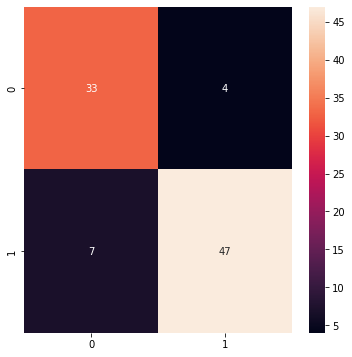

In [46]:
cm1 = confusion_matrix(Y_test, y_pred)
plt.figure(figsize = (6,6))
sns.heatmap(cm1, annot=True)

TP1 = cm1[0,0]
FP1 = cm1[0,1]
FN1 = cm1[1,0]
TN1 = cm1[1,1]
accuracy1=((TP1+TN1)/(TP1+TN1+FP1+FN1))*100
precision1=(TP1/(TP1+FP1))*100
recall1=(TP1/(TP1+FN1))*100
f1=2*(1/((1/precision1)+(1/recall1)))
print('Accuracy for test set =', accuracy1 , "(%d percent)" %math.ceil(accuracy1))
print('Precision for test set =', precision1, "(%d percent)" %math.ceil(precision1))
print('Recall for test set =',recall1, "(%d percent)" %math.ceil(recall1))
print('F1 for test set =', f1, "(%d percent)" %math.ceil(f1))